In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Creating a DataFrame for the Train Dataset
df_train = pd.read_csv('./datasets/train.csv')

In [3]:
# Creating a DataFrame for the Test Dataset
df_test = pd.read_csv('./datasets/test.csv')

In [4]:
# Checking Structure of dataframe
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# Checking Structure of dataframe
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
# Statistics of the Train Dataset
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
# Statistics of the Train Dataset
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [8]:
# Checking Info across entire dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
# Checking Info across entire dataset.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [10]:
# Checking for dtypes on train set
df_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [11]:
# Checking for dtypes on train set
df_test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [12]:
# Checking for the total of nulls in the train set.
df_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [13]:
# Checking Train set
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
# Checking for the total of nulls in the test set.
df_test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [15]:
# Checking Number of Rows and Columns on Train Set.
df_train.shape

(2051, 81)

In [16]:
# Checking Number of Rows and Columns on Test Set.
df_test.shape

(878, 80)

In [17]:
# What are the best parameters to predict house prices.
# Lot Area
# Overall Qual
# Year Built
# Price

In [18]:
# Building a list for initial analysis with the most obvious parameters
features = ['Lot Area','Overall Qual']
X_train = df_train[features]
y_train = df_train['SalePrice']
X_test = df_test[features]


In [19]:
# Checking Numbers of Rows and Columns for the variables before training the model
print(X_train.shape)
print(y_train.shape)

(2051, 2)
(2051,)


In [20]:
# Checking Dataframe X_train
X_train.head()

,Lot Area,Overall Qual
0,13517,6
1,11492,7
2,7922,5
3,9802,5
4,14235,6


In [21]:
# Checking y_train
y_train.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [22]:
# Checking Dimensions Train X
X_train.shape

(2051, 2)

In [23]:
# Checking Dimensions y train
y_train.shape

(2051,)

In [24]:
# Instantiating Liner Regression Model
lr = LinearRegression()

In [25]:
# Fitting Linear Regression Model
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
# Coefficients for Slopes
lr.coef_

array([2.51893208e+00, 4.32078019e+04])

In [27]:
# Coefficients for Intersections
lr.intercept_

-107976.02640228457

In [28]:
# y - mx + b

In [29]:
# Evaluating Model - Getting R2
lr.score(X_train,y_train)

0.6857344933467675

In [30]:
# Displaying Coeffs for Features Lot Area and Overall Quality
[f'{X_train.columns[i]}: {lr.coef_[i]}' for i in range(len(X_train.columns))]

['Lot Area: 2.518932081417335', 'Overall Qual: 43207.801862379005']

In [31]:
# Predicitions 
ypreds_test = lr.predict(X_test)

In [32]:
ypreds_test

array([174298.86186031, 132400.90468026, 237562.40095493, 129524.28424329,
       175200.63954545,  69615.96268111,  86306.40665258, 131453.78621765,
       203332.63290055, 176774.97209634, 169344.12245616, 169407.09575819,
       179759.90661282, 214569.58891575, 180835.49061158, 130884.50756725,
       178475.2512513 , 132171.68186086, 178475.2512513 , 282198.43730747,
       128834.09685298, 129471.38666958, 171452.46860831, 205309.43471464,
       218672.92927638, 126148.91525419,  96374.57818201, 130733.37164237,
       173437.38708846,  30463.64146981,  83344.14252483,  80573.31723528,
       223950.09198695, 133252.30372378, 222604.98225547, 227738.5658374 ,
        78759.68613666,  87525.56977999, 130461.32697757, 212919.68840242,
       161223.08542567, 222725.89099538, 126672.85312712, 144736.11508297,
       204690.33729243,  68716.70392804, 222816.57255031, 127710.65314467,
       122844.07636337, 126954.97352024, 131839.18282611, 260356.7772295 ,
       261225.80879759, 1

In [33]:
# Working with Training Data
ypreds = lr.predict(X_train)

In [34]:
# Calculating Residuals for Predictions
resids = y_train - ypreds
resids

0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          2.,   1.,   1.,   3.,   5.,   4.,  15.,  26.,  25.,  43.,  51.,
         63.,  84.,  90., 106.,  85., 130., 148., 169., 166., 133., 138.,
        104.,  82.,  70.,  54.,  45.,  33.,  31.,  23.,  17.,  12.,  12.,
         12.,  13.,   7.,   3.,   3.,   3.,   4.,   4.,   3.,   1.,   0.,
          2.,   4.,   3.,   3.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-325029.00610701, -318796.50878513, -312564.01146325,
        -306331.51414137, -300099.01681949, -293866.51949761,
        -287634.02217573, -281401.52485385, -275169.02753197,
        -268936.53021009, -262704.03288821, -256471.53556633,
        -250239.03824445, -244006.54092257, -237774.04360069,
        

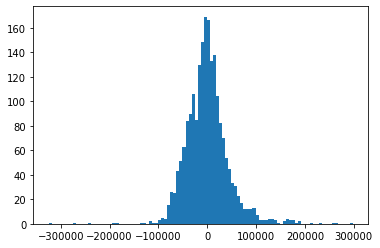

In [35]:
# Plotting Residuals
plt.hist(resids, bins = 100)

In [36]:
# plt.scatter(ypreds, resids)

In [37]:
# Calculate RSS
rss = (resids ** 2).sum()
rss

4047100798395.6553

In [38]:
# MSE
mse = rss / len(resids)
mse

1973232958.74971

In [39]:
# RMSE
rmse = mse ** 0.5
rmse

44421.08687042349

In [40]:
# Null prediction
null_prediction = y_train.mean()
null_prediction

181469.70160897123

In [41]:
# Null residuals
null_residuals = y_train - null_prediction
null_residuals

0       -50969.701609
1        38530.298391
2       -72469.701609
3        -7469.701609
4       -42969.701609
            ...      
2046    117281.298391
2047    -98969.701609
2048     -4469.701609
2049    -37469.701609
2050      7530.298391
Name: SalePrice, Length: 2051, dtype: float64

In [42]:
# Null sum of squares
null_ss = (null_residuals ** 2).sum()
null_ss

12877966918785.385

In [43]:
# R2
1 - rss / null_ss

0.6857344933467675

In [44]:
# R2 from model
lr.score(X_train, y_train)

0.6857344933467675

In [45]:
# Checking Dataset for Test
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


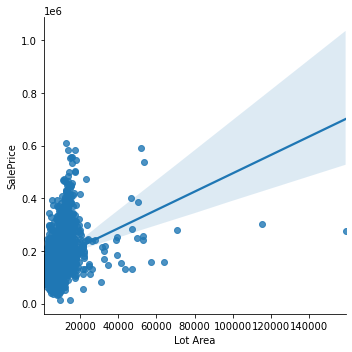

In [46]:
# Plotting Lot Area Feature vs Predicted SalePrice
sns.lmplot(x='Lot Area', y='SalePrice', data=df_train)
plt.show()

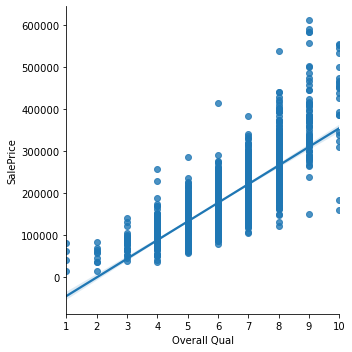

In [47]:
# Plotting Overall Quality Feature vs Predicted SalePrice
sns.lmplot(x='Overall Qual', y='SalePrice', data=df_train)
plt.show()

In [48]:
df_train['PricePreds'] = ypreds

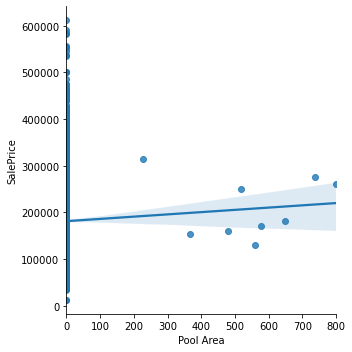

In [49]:
# Plotting Pool Area Feature vs Predicted SalePrice
sns.lmplot(x='Pool Area', y='SalePrice', data=df_train)
plt.show()

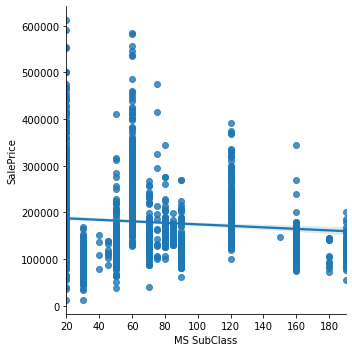

In [50]:
# Plotting MS SubClass Feature vs Predicted SalePrice
sns.lmplot(x='MS SubClass', y='SalePrice', data=df_train)
plt.show()

(array([770.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   0.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,
          0.,   0., 198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 394.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  90.,   0.,   0.,   0.,   0.,   0.,  16.,   0.,
          0.,   0.,   0.,   0.,  86.,   0.,   0.,   0.,   0.,   0.,  28.,
          0.,   0.,   0.,   0.,   0.,  75.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 132.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

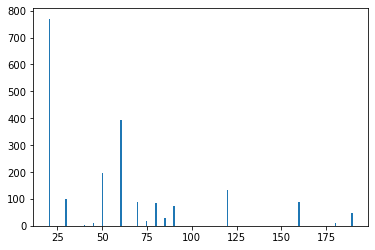

In [51]:
# Plotting MS SubClass Feature vs Predicted SalePrice
plt.hist(df_train['MS SubClass'],bins = 200)

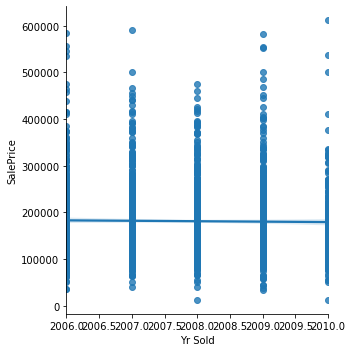

In [52]:
# Plotting Year Sold Feature vs Predicted SalePrice
sns.lmplot(x='Yr Sold', y='SalePrice', data=df_train)
plt.show()

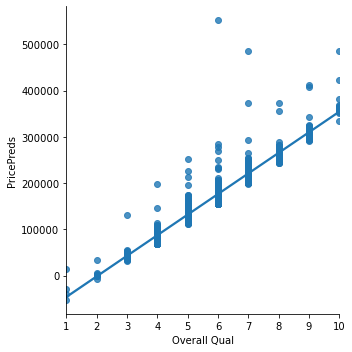

In [53]:
# Plotting Overall Quality Feature vs Predicted SalePrice
sns.lmplot(x='Overall Qual', y='PricePreds', data=df_train)
plt.show()

In [54]:
# Checking Train Dataset top 10 values
df_train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,PricePreds
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,185319.189717
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,223426.154114
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,128017.962859
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,132753.555172
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,187127.782951
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,190000,192813.012659
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,New,140000,160527.860171
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,5,2010,COD,142000,138693.197020
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,400,6,2007,WD,112500,147819.287951
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,9,2007,WD,135000,137297.708647


In [55]:
# Checking Train Dataset top 20 values
df_train.head(20)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,PricePreds
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,185319.189717
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,223426.154114
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,128017.962859
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,132753.555172
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,187127.782951
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,190000,192813.012659
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,New,140000,160527.860171
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,5,2010,COD,142000,138693.197020
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,400,6,2007,WD,112500,147819.287951
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,9,2007,WD,135000,137297.708647


In [56]:
# Evaluation Script

features = ['Lot Area']
X = df_train[features]
y = df_train['SalePrice']

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X,y)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X,y)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 1)
(2051,)
### COEFFS M #### [3.48616225]
### COEFFS B #### 146380.75281083363
### SCORE #### 0.08795129292740034
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [57]:
# Evaluation Script

features = ['Lot Area','Overall Qual']
X = df_train[features]
y = df_train['SalePrice']

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X,y)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X,y)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 2)
(2051,)
### COEFFS M #### [2.51893208e+00 4.32078019e+04]
### COEFFS B #### -107976.02640228457
### SCORE #### 0.6857344933467675
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [58]:
# Evaluation Script

features = ['Lot Area','Overall Qual','Yr Sold']
X = df_train[features]
y = df_train['SalePrice']

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X,y)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X,y)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 3)
(2051,)
### COEFFS M #### [2.51896928e+00 4.32078546e+04 6.69603625e+00]
### COEFFS B #### -121420.8619625122
### SCORE #### 0.6857345056214628
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [59]:
# Evaluation Script

features = ['Yr Sold']
X = df_train[features]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X_test,y_test)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 1)
(2051,)
### COEFFS M #### [-327.3855837]
### COEFFS B #### 838178.8934101285
### SCORE #### -0.0008788173697573676
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [60]:
features = ['Lot Area','Overall Qual']
X = df_train[features]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X_test,y_test)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 2)
(2051,)
### COEFFS M #### [2.29114142e+00 4.31695132e+04]
### COEFFS B #### -105673.31456788967
### SCORE #### 0.709204941541105
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [61]:
features = ['Lot Area','Overall Qual','Yr Sold']
X = df_train[features]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X_test,y_test)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 3)
(2051,)
### COEFFS M #### [2.29230656e+00 4.31714728e+04 3.21476694e+02]
### COEFFS B #### -751137.6549087348
### SCORE #### 0.7089451503310863
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [62]:
# Checking Train Dataset
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,PricePreds
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,185319.189717
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,223426.154114
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,128017.962859
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,132753.555172
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,187127.782951


In [63]:
# Checking Train Dataset Pool Area Column.
df_train['Pool Area'].describe()

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64

In [64]:
# Evaluating model adding Pool Area Feature
features = ['Lot Area','Overall Qual','Pool Area']
X = df_train[features]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X_test,y_test)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 3)
(2051,)
### COEFFS M #### [ 2.30072824e+00  4.31673562e+04 -1.17624481e+01]
### COEFFS B #### -105725.43980894011
### SCORE #### 0.709327143407931
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [65]:
# Evaluating model adding MS SubClass Feature
features = ['Lot Area','Overall Qual','Pool Area','Yr Sold','MS SubClass']
X = df_train[features]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X_test,y_test)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 5)
(2051,)
### COEFFS M #### [ 2.08336256e+00  4.34217305e+04 -5.96901459e+00  1.60450202e+02
 -1.31650182e+02]
### COEFFS B #### -419709.43981279276
### SCORE #### 0.7109823041075626
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [66]:
0.711127036328009 - 0.7109823041075626

0.00014473222044641965

In [67]:
# Evaluating model with Features with Higher Scores
features = ['Lot Area','Overall Qual','Pool Area','MS SubClass']
X = df_train[features]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

print(X.shape)
print(y.shape)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
print(f'### COEFFS M #### {lr.coef_}')

lr.intercept_
print(f'### COEFFS B #### {lr.intercept_}')

lr.score(X,y)
print(f'### SCORE #### {lr.score(X_test,y_test)}')

resids = y - ypreds
resids
print(f'### RESIDUALS #### {resids}')

(2051, 4)
(2051,)
### COEFFS M #### [ 2.08269931e+00  4.34210435e+04 -6.21783235e+00 -1.31825846e+02]
### COEFFS B #### -97546.04546554206
### SCORE #### 0.711127036328009
### RESIDUALS #### 0      -54819.189717
1       -3426.154114
2      -19017.962859
3       41246.444828
4      -48627.782951
            ...     
2046    32225.358103
2047   -13443.840796
2048     6691.126557
2049    52947.925306
2050   -24370.577245
Name: SalePrice, Length: 2051, dtype: float64


In [68]:
# Comparing agains Null Model
y.mean()

181469.70160897123

In [69]:
X.head()

,Lot Area,Overall Qual,Pool Area,MS SubClass
0,13517,6,0,60
1,11492,7,0,60
2,7922,5,0,20
3,9802,5,0,60
4,14235,6,0,50


In [70]:
# Example Using Cross Validation
scores = cross_val_score(lr, X, y, cv=5)

In [71]:
scores

array([0.69872234, 0.63245883, 0.6822418 , 0.70946395, 0.65756374])

In [72]:
print("Accuracy: %0.2f ± %0.2f" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 ± 0.06


In [73]:
# Polynomial Features
features = ['Lot Area','Overall Qual','Pool Area','MS SubClass']
X = df_train[features]
y = df_train['SalePrice']

In [74]:
poly = PolynomialFeatures(include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [75]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.3517e+04, 6.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.6000e+03],
       [1.1492e+04, 7.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.6000e+03],
       [7.9220e+03, 5.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+02],
       ...,
       [7.5580e+03, 6.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.5000e+03],
       [1.0400e+04, 4.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+02],
       [7.5000e+03, 7.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.6000e+03]])

In [76]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

,Lot Area,Overall Qual,Pool Area,MS SubClass,Lot Area^2,Lot Area Overall Qual,Lot Area Pool Area,Lot Area MS SubClass,Overall Qual^2,Overall Qual Pool Area,Overall Qual MS SubClass,Pool Area^2,Pool Area MS SubClass,MS SubClass^2
0,13517.0,6.0,0.0,60.0,182709289.0,81102.0,0.0,811020.0,36.0,0.0,360.0,0.0,0.0,3600.0
1,11492.0,7.0,0.0,60.0,132066064.0,80444.0,0.0,689520.0,49.0,0.0,420.0,0.0,0.0,3600.0
2,7922.0,5.0,0.0,20.0,62758084.0,39610.0,0.0,158440.0,25.0,0.0,100.0,0.0,0.0,400.0
3,9802.0,5.0,0.0,60.0,96079204.0,49010.0,0.0,588120.0,25.0,0.0,300.0,0.0,0.0,3600.0
4,14235.0,6.0,0.0,50.0,202635225.0,85410.0,0.0,711750.0,36.0,0.0,300.0,0.0,0.0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,11449.0,8.0,0.0,20.0,131079601.0,91592.0,0.0,228980.0,64.0,0.0,160.0,0.0,0.0,400.0
2047,12342.0,4.0,0.0,30.0,152324964.0,49368.0,0.0,370260.0,16.0,0.0,120.0,0.0,0.0,900.0
2048,7558.0,6.0,0.0,50.0,57123364.0,45348.0,0.0,377900.0,36.0,0.0,300.0,0.0,0.0,2500.0
2049,10400.0,4.0,0.0,20.0,108160000.0,41600.0,0.0,208000.0,16.0,0.0,80.0,0.0,0.0,400.0


In [77]:
# Cross Validation Using X_poly
cross_val_score(lr, X_poly, y, cv=5).mean()

0.6437485120601628

In [78]:
features = ['Lot Area','Overall Qual','Pool Area','MS SubClass']
X = df_train[features]
y = df_train['SalePrice']
poly = PolynomialFeatures(include_bias=False)
poly
X_poly = poly.fit_transform(X)
X_poly
pd.DataFrame(X_poly, columns=poly.get_feature_names(features))
cross_val_score(lr, X_poly, y, cv=5).mean()

0.6437485120601628

In [79]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,PricePreds
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,185319.189717
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,223426.154114
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,128017.962859
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,132753.555172
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,187127.782951


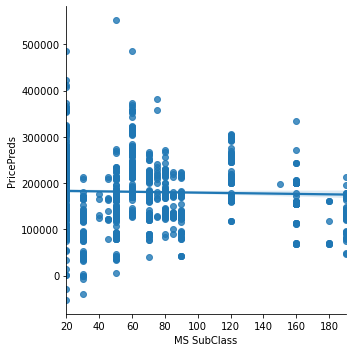

In [80]:
# Plotting Feature MS SubClass vs PricePreds
sns.lmplot(x='MS SubClass', y='PricePreds', data=df_train)
plt.show()

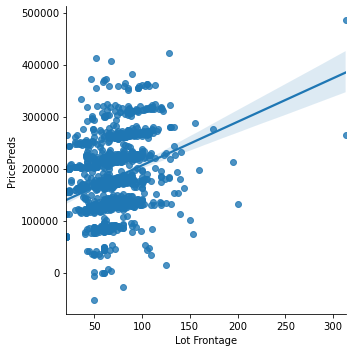

In [81]:
# Plotting Feature Lot Frontage vs PricePreds
sns.lmplot(x='Lot Frontage', y='PricePreds', data=df_train)
plt.show()

In [82]:
# Checking Dataframe trains
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [83]:
# Checking Dataframe Train Types
df_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
PricePreds      float64
Length: 82, dtype: object

In [84]:
# Checking Dataframe Train Column for Lot Frontage
df_train['Lot Frontage']

0        NaN
1       43.0
2       68.0
3       73.0
4       82.0
        ... 
2046    79.0
2047     NaN
2048    57.0
2049    80.0
2050    60.0
Name: Lot Frontage, Length: 2051, dtype: float64

In [85]:
# Checking Dataframe Train Column for Lot Frontage
df_train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [86]:
# Dropping NA Dataframe Train for Lot Frontage Column
df_train['Lot Frontage'].dropna

<bound method Series.dropna of 0        NaN
1       43.0
2       68.0
3       73.0
4       82.0
        ... 
2046    79.0
2047     NaN
2048    57.0
2049    80.0
2050    60.0
Name: Lot Frontage, Length: 2051, dtype: float64>

In [87]:
df_train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [88]:
# df['Lot Frontage'].dropna(axis=0, inplace=True)

In [89]:
type(df_train)

pandas.core.frame.DataFrame

In [90]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,PricePreds
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,185319.189717
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,223426.154114
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,128017.962859
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,132753.555172
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,187127.782951


In [91]:
# NaN are present in all rows.

In [92]:
type(X_train)

pandas.core.frame.DataFrame

In [93]:
# features = ['Lot Area','Overall Qual','Pool Area','Yr Sold','MS SubClass']
# X = df[features]
# y = df['SalePrice']type(y)

In [94]:
# features = ['Lot Area','Overall Qual','Pool Area','Yr Sold','MS SubClass']
# y = df['SalePrice']


def project_two_lr(feature_list, predict_var):
    
    # Input Parameters
    X = df_train[feature_list]
    y = df_train[predict_var]
    
    # Split for Train and Test Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

    # Liner Model Instantiation
    lr = LinearRegression()
    
    # Model Fit
    lr.fit(X_train,y_train)
    
    # Coeffs for Slope of M
    lr.coef_
    print(f'### COEFFS M #### {lr.coef_}')
    
    # Coeffs for Slope of B
    lr.intercept_
    print(f'### COEFFS B #### {lr.intercept_}')
    
    # Score Calculation
    score = lr.score(X,y)
    print(f'### SCORE #### {lr.score(X_test,y_test)}')
    
    return score

print(project_two_lr(['Lot Area','Overall Qual','Pool Area','Yr Sold','MS SubClass'], 'SalePrice'))

### COEFFS M #### [ 2.08336256e+00  4.34217305e+04 -5.96901459e+00  1.60450202e+02
 -1.31650182e+02]
### COEFFS B #### -419709.43981279276
### SCORE #### 0.7109823041075626
0.6895048496930581


In [95]:
# features = ['Lot Area','Overall Qual','Pool Area','Yr Sold','MS SubClass']
# y = df['SalePrice']


def project_two_lr(feature_list, predict_var):
    
    # Input Parameters
    X = df_train[feature_list]
    y = df_train[predict_var]
    
    # Split for Train and Test Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

    # Liner Model Instantiation
    lr = LinearRegression()
    
    # Model Fit
    lr.fit(X_train,y_train)
    
    # Coeffs for Slope of M
    lr.coef_
    print(f'### COEFFS M #### {lr.coef_}')
    
    # Coeffs for Slope of B
    lr.intercept_
    print(f'### COEFFS B #### {lr.intercept_}')
    
    # Score Calculation
    score = lr.score(X_test,y_test)
    print(f'### SCORE #### {lr.score(X_test,y_test)}')
    
    return score

print(project_two_lr(['Lot Area','Overall Qual','Pool Area','Yr Sold','MS SubClass'], 'SalePrice'))

### COEFFS M #### [ 2.08336256e+00  4.34217305e+04 -5.96901459e+00  1.60450202e+02
 -1.31650182e+02]
### COEFFS B #### -419709.43981279276
### SCORE #### 0.7109823041075626
0.7109823041075626


In [96]:
# Generating Predictions 

df_test.shape
# df_test['SalePrice'] = lr.predict(X_test)

(878, 80)

In [97]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [99]:
X_test.head()

,Lot Area,Overall Qual,Pool Area,MS SubClass
1970,9452,8,0,60
1739,19378,7,0,60
1263,15138,8,0,60
1942,5175,5,0,20
1258,8400,5,0,20


In [100]:
X_test.shape

(411, 4)

In [101]:
X_test.index

Int64Index([1970, 1739, 1263, 1942, 1258, 1916,  772,  963,  196,  874,
            ...
             550, 1025,   48,   90,  232,  374, 1831, 1854,  775,  352],
           dtype='int64', length=411)

In [102]:
X_test.index[0]

1970

In [103]:
# Generating Predictions 
df_test.head()
# df_test['SalePrice'] = lr.predict(X_test)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [104]:
df_test.shape

(878, 80)

In [105]:
df_train.shape

(2051, 82)

In [106]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [107]:
df_test.shape

(878, 80)

In [108]:
df_train.shape

(2051, 82)

In [109]:
predictions = lr.predict(X_test)

In [110]:
predictions

array([261598.42585135, 238850.25571054, 273440.65414306, 127700.62415767,
       134417.32944096, 131033.2136869 ,  79269.23756096, 148136.17829745,
       219026.76281409, 168483.42890469, 229002.89252168, 124356.44052922,
       173183.81062434, 224766.68211975, 277037.11501734, 265120.27038903,
       281092.13057907,  59078.0991925 , 123441.04907648, 120753.37071834,
       219384.98709587, 224191.85710946, 177525.96806221, 181524.75074249,
       143535.38703173, 177691.13277557, 172440.37717939, 223814.88853387,
       171407.35832031, 155581.4675015 , 260794.50391666,  83284.14057774,
       310934.33541741, -46348.02229463,  92037.63557913, 185127.82055337,
       131403.66353556, 182439.32636974,  80868.3897944 , 271718.2618115 ,
       165432.63525033, 264691.09969516,  87691.1323233 , 226309.96231042,
       222121.65399269, 198165.51825055, 214824.10180436, 136245.93943746,
        79756.04794212, 261552.60646647, 272240.65850031, 173864.94350924,
        49143.60519675, 1

In [111]:
X_test.index

Int64Index([1970, 1739, 1263, 1942, 1258, 1916,  772,  963,  196,  874,
            ...
             550, 1025,   48,   90,  232,  374, 1831, 1854,  775,  352],
           dtype='int64', length=411)

In [112]:
type(predictions)

numpy.ndarray

In [113]:
type(X_test.index)

pandas.core.indexes.numeric.Int64Index

In [114]:
list_index = X_test.index.to_list

In [115]:
list_predictions = predictions.tolist

In [116]:
predictions[0]

261598.42585134646

In [117]:
X_test.index[0]

1970

In [118]:
predictions[1]

238850.25571054418

In [119]:
X_test.index[1]

1739

In [120]:
type(predictions)

numpy.ndarray

In [121]:
len(predictions)

411

In [122]:
for i in range(len(predictions)):
    print(f'### Index {X_test.index[i]} - Prediction {predictions[i]}')
    print("------------------")

### Index 1970 - Prediction 261598.42585134646
------------------
### Index 1739 - Prediction 238850.25571054418
------------------
### Index 1263 - Prediction 273440.65414306347
------------------
### Index 1942 - Prediction 127700.62415766803
------------------
### Index 1258 - Prediction 134417.3294409581
------------------
### Index 1916 - Prediction 131033.21368690455
------------------
### Index 772 - Prediction 79269.23756095534
------------------
### Index 963 - Prediction 148136.17829744978
------------------
### Index 196 - Prediction 219026.7628140936
------------------
### Index 874 - Prediction 168483.42890468927
------------------
### Index 1766 - Prediction 229002.89252167795
------------------
### Index 1366 - Prediction 124356.44052922094
------------------
### Index 820 - Prediction 173183.81062433636
------------------
### Index 1149 - Prediction 224766.68211975176
------------------
### Index 1418 - Prediction 277037.1150173406
------------------
### Index 989 - Pre

In [123]:
df_test.shape

(878, 80)

In [124]:
df_test.head(15)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,2,2008,WD


In [125]:
type(list_index)

method

In [126]:
type(X_test.index)

pandas.core.indexes.numeric.Int64Index

In [127]:
index_list = []
# prices_list = []
for i in range(len(predictions)):
    print(f'### Index {X_test.index[i]} - Prediction {predictions[i]}')
    index_list.append(X_test.index[i])
    # index_list.append(predictions[i])
    print("------------------")

### Index 1970 - Prediction 261598.42585134646
------------------
### Index 1739 - Prediction 238850.25571054418
------------------
### Index 1263 - Prediction 273440.65414306347
------------------
### Index 1942 - Prediction 127700.62415766803
------------------
### Index 1258 - Prediction 134417.3294409581
------------------
### Index 1916 - Prediction 131033.21368690455
------------------
### Index 772 - Prediction 79269.23756095534
------------------
### Index 963 - Prediction 148136.17829744978
------------------
### Index 196 - Prediction 219026.7628140936
------------------
### Index 874 - Prediction 168483.42890468927
------------------
### Index 1766 - Prediction 229002.89252167795
------------------
### Index 1366 - Prediction 124356.44052922094
------------------
### Index 820 - Prediction 173183.81062433636
------------------
### Index 1149 - Prediction 224766.68211975176
------------------
### Index 1418 - Prediction 277037.1150173406
------------------
### Index 989 - Pre

------------------
### Index 832 - Prediction 248857.01271456474
------------------
### Index 1493 - Prediction 126213.84747743691
------------------
### Index 1589 - Prediction 90044.4923369308
------------------
### Index 468 - Prediction 168870.72076717525
------------------
### Index 1711 - Prediction 134479.81042033754
------------------
### Index 1424 - Prediction 216363.35123188287
------------------
### Index 1920 - Prediction 131712.17366282784
------------------
### Index 485 - Prediction 131918.0902657804
------------------
### Index 273 - Prediction 131918.0902657804
------------------
### Index 1967 - Prediction 175562.343449047
------------------
### Index 1393 - Prediction 260579.98588746157
------------------
### Index 1409 - Prediction 213901.60064433282
------------------
### Index 949 - Prediction 234347.0989579329
------------------
### Index 696 - Prediction 47042.16159029244
------------------
### Index 63 - Prediction 128188.2464258273
------------------
### Inde

### Index 436 - Prediction 151325.0615741136
------------------
### Index 401 - Prediction 167558.620200207
------------------
### Index 1963 - Prediction 226087.47432263673
------------------
### Index 866 - Prediction 268441.81495404197
------------------
### Index 1152 - Prediction 205286.26720049424
------------------
### Index 552 - Prediction 265611.4265881532
------------------
### Index 289 - Prediction 209240.79021162604
------------------
### Index 602 - Prediction 127314.77564984653
------------------
### Index 1710 - Prediction 137258.13130341007
------------------
### Index 27 - Prediction 137335.46180697763
------------------
### Index 1691 - Prediction 136916.5686161358
------------------
### Index 1596 - Prediction 126850.97304777417
------------------
### Index 810 - Prediction 176730.73776344256
------------------
### Index 1140 - Prediction 259434.50126550515
------------------
### Index 35 - Prediction 179087.99254669406
------------------
### Index 1901 - Predictio

In [128]:
index_list

[1970,
 1739,
 1263,
 1942,
 1258,
 1916,
 772,
 963,
 196,
 874,
 1766,
 1366,
 820,
 1149,
 1418,
 989,
 102,
 1788,
 961,
 638,
 881,
 1790,
 238,
 54,
 1713,
 1066,
 999,
 14,
 1096,
 1215,
 958,
 264,
 317,
 1428,
 549,
 1408,
 1950,
 1848,
 1486,
 1583,
 1497,
 1726,
 1736,
 1233,
 1186,
 1224,
 616,
 1927,
 1429,
 1581,
 706,
 904,
 843,
 737,
 1381,
 1819,
 1643,
 428,
 1844,
 1341,
 5,
 734,
 1533,
 1371,
 18,
 1894,
 88,
 1288,
 1687,
 940,
 1060,
 440,
 1126,
 2006,
 789,
 1874,
 534,
 1252,
 1296,
 1729,
 193,
 589,
 1181,
 1592,
 788,
 918,
 397,
 1579,
 496,
 1578,
 158,
 1318,
 1522,
 1760,
 508,
 1510,
 1169,
 934,
 1305,
 300,
 1283,
 1934,
 486,
 1968,
 1395,
 720,
 81,
 17,
 1337,
 1563,
 1886,
 980,
 361,
 1029,
 1638,
 2044,
 1884,
 78,
 221,
 1063,
 1964,
 993,
 1410,
 809,
 967,
 1076,
 535,
 1190,
 1298,
 1090,
 307,
 244,
 358,
 240,
 219,
 519,
 634,
 1207,
 1326,
 1250,
 399,
 1055,
 1505,
 1187,
 832,
 1493,
 1589,
 468,
 1711,
 1424,
 1920,
 485,
 273,
 196

In [129]:
type(predictions)

numpy.ndarray

In [130]:
list_of_tuples = list(zip(index_list, predictions))

In [131]:
list_of_tuples

[(1970, 261598.42585134646),
 (1739, 238850.25571054418),
 (1263, 273440.65414306347),
 (1942, 127700.62415766803),
 (1258, 134417.3294409581),
 (1916, 131033.21368690455),
 (772, 79269.23756095534),
 (963, 148136.17829744978),
 (196, 219026.7628140936),
 (874, 168483.42890468927),
 (1766, 229002.89252167795),
 (1366, 124356.44052922094),
 (820, 173183.81062433636),
 (1149, 224766.68211975176),
 (1418, 277037.1150173406),
 (989, 265120.2703890344),
 (102, 281092.1305790664),
 (1788, 59078.09919249796),
 (961, 123441.04907647884),
 (638, 120753.37071833978),
 (881, 219384.9870958691),
 (1790, 224191.85710946086),
 (238, 177525.96806220803),
 (54, 181524.75074249232),
 (1713, 143535.38703173137),
 (1066, 177691.13277557294),
 (999, 172440.37717938755),
 (14, 223814.88853387156),
 (1096, 171407.3583203141),
 (1215, 155581.46750150056),
 (958, 260794.50391666434),
 (264, 83284.14057774167),
 (317, 310934.33541741414),
 (1428, -46348.022294633935),
 (549, 92037.63557913498),
 (1408, 185127.

In [132]:
df_sub = pd.DataFrame(list_of_tuples, 
                  columns = ['Id', 'SalePrice'])

In [133]:
df_sub

,Id,SalePrice
0,1970,261598.425851
1,1739,238850.255711
2,1263,273440.654143
3,1942,127700.624158
4,1258,134417.329441
...,...,...
406,374,260588.406894
407,1831,263239.592910
408,1854,351138.628313
409,775,133440.543463


In [134]:
df_sub.to_csv('./datasets/submission_1.csv', index=False)

In [135]:
df_sub.head()

,Id,SalePrice
0,1970,261598.425851
1,1739,238850.255711
2,1263,273440.654143
3,1942,127700.624158
4,1258,134417.329441


In [136]:
df_sub.head(50)

,Id,SalePrice
0,1970,261598.425851
1,1739,238850.255711
2,1263,273440.654143
3,1942,127700.624158
4,1258,134417.329441
5,1916,131033.213687
6,772,79269.237561
7,963,148136.178297
8,196,219026.762814
9,874,168483.428905


In [137]:
len(df_sub)

411

In [138]:
df_sub = df_sub[np.arange(len(df_sub)) % 2 == 0]

In [139]:
df_sub

,Id,SalePrice
0,1970,261598.425851
2,1263,273440.654143
4,1258,134417.329441
6,772,79269.237561
8,196,219026.762814
...,...,...
402,1025,224518.840902
404,90,175560.441169
406,374,260588.406894
408,1854,351138.628313


In [140]:
df_sub = pd.read_csv('./datasets/submission_1.csv')

In [141]:
df_sub.to_csv('./datasets/submission_1.csv', index=False)

In [142]:
df_sub["Id"] = df_sub["Id"].astype('Int32')

In [143]:
df_sub.to_csv('./datasets/submission_1.csv', index=False)

In [144]:
df_sub

,Id,SalePrice
0,1970,261598.425851
1,1739,238850.255711
2,1263,273440.654143
3,1942,127700.624158
4,1258,134417.329441
...,...,...
406,374,260588.406894
407,1831,263239.592910
408,1854,351138.628313
409,775,133440.543463


In [145]:
# Using GridSearch to Explore Hyperparameters

In [146]:
array_test = [261598.42585135, 238850.25571054, 273440.65414306, 127700.62415767,
       134417.32944096, 131033.2136869 ,  79269.23756096, 148136.17829745,
       219026.76281409, 168483.42890469, 229002.89252168, 124356.44052922,
       173183.81062434, 224766.68211975, 277037.11501734, 265120.27038903,
       281092.13057907,  59078.0991925 , 123441.04907648, 120753.37071834,
       219384.98709587, 224191.85710946, 177525.96806221, 181524.75074249,
       143535.38703173, 177691.13277557, 172440.37717939, 223814.88853387,
       171407.35832031, 155581.4675015 , 260794.50391666,  83284.14057774,
       310934.33541741, -46348.02229463,  92037.63557913, 185127.82055337,
       131403.66353556, 182439.32636974,  80868.3897944 , 271718.2618115 ,
       165432.63525033, 264691.09969516,  87691.1323233 , 226309.96231042,
       222121.65399269, 198165.51825055, 214824.10180436, 136245.93943746,
        79756.04794212, 261552.60646647, 272240.65850031, 173864.94350924,
        49143.60519675, 106064.61544982, 138097.54933607, 315136.86179167,
        45069.84534121, 231598.2967039 , 125456.74117246, 178588.14471166,
       194691.57579705, 222242.81139149, 214111.95327491, 173194.31433057,
       177415.58499864, 136021.0079117 , 136916.56861614, 180733.32500369,
       217608.80542085, 319260.60643072, 313376.98087248, 221192.77009925,
       220664.1253125 , 145387.01520475, 216715.32741572, 182231.14664815,
       126647.40977313,  96619.57406696, 282112.65324226, 180620.8592408 ,
       225424.81510255, 264107.71768442, 141396.72546664, 362186.32835112,
       236769.81951654, 131337.28778655, 184711.28069084, 176226.63432012,
       131501.55040325, 173881.24426507,  71653.70827127, 219666.60255141,
       269858.41132531, 214439.11748633, 134169.48822275, 144595.58946595,
       130668.47067819, 362914.91227188, 272026.14047111, 257046.1864119 ,
       226454.02940166, 278971.94267879, 166214.28289873, 212914.31096047,
       129012.72472464, 223648.27258886, 326893.69941157, 135283.73235502,
       213408.00090724, 150518.94845604, 225424.81510255, 204080.38429847,
       313770.97188124, 178375.70938177, 128225.55459412, 172675.72220172,
       171628.12444745, 131854.15805475, 139122.14718823, 229136.18527769,
       398853.04336287, 180962.42192808, 213156.2649194 , 228540.53327427,
       180337.61213428, 183574.39749514, 129418.8510906 , 137228.97351303,
       222509.03606484, 247345.6764165 , 172009.168212  , 171771.56007103,
       138830.56928446, 142015.0165335 , 128735.81592572, 323800.99941637,
       195330.71213145, 241278.68310909, 217808.92497419, 197209.30691146,
       136291.75882234, 146444.9179715 , 134417.32944096, 224277.24778128,
       248857.01271456, 126213.84747744,  90044.49233693, 168870.72076718,
       134479.81042034, 216363.35123188, 131712.17366283, 131918.09026578,
       131918.09026578, 175562.34344905, 260579.98588746, 213901.60064433,
       234347.09895793,  47042.16159029, 128188.24642583, 109321.9571748 ,
       167635.49965544, 181487.26215486, 248207.21052902, 136916.56861614,
        99520.77420948, 174920.87206075, 124518.89107561, 127963.31490006,
       146297.15480438, 202782.6102721 , 228017.7757468 , 268929.1665932 ,
       230346.594417  , 261177.35975153, 222790.20047205, 156261.05894509,
       170663.01884021, 318962.78042901, 190782.45767129, 206167.24900974,
       137228.97351303, 182280.77059298, 134583.94538597, 219214.5665909 ,
       214736.7630687 , 132595.41859072, 184357.44801089,  91227.73617551,
       146636.63479234,  91635.76482146, 112537.39255894, 197736.22983756,
       223667.01688267, 266300.80006064, 293373.55607116,  38647.34191901,
       267588.26907452, 138272.67649767, 245103.98855317, 226541.14193413,
       125963.92355992, 168885.11924303,  85872.8456137 , 129675.11331572,
       177433.11439826,  55733.46451572, 175770.25254165,  94376.05192041,
       269772.65981482, 224508.87845332, 132376.28411456, 311055.13197755,
       183503.31508951, 255417.15471074, 134073.95468337, 256592.15796174,
       182118.5906756 , 151414.23853148, 136443.79587216, 141459.20644602,
       277970.16430941, 217847.95500313, 175510.45638556,  90996.28592281,
       180868.70045901, 174300.13745592, 134648.77969366, 176410.18248863,
       222717.30599611, 197829.95130663, 224633.75020241, 187783.262177  ,
        80793.41261915, 210401.84997359, 218017.01448613, 218625.25289509,
       214555.5682285 , 180487.56648479, 153455.28385787, 220949.09427967,
       242007.01467527, 220626.63672487, 133541.05428833, 145028.6824389 ,
       267983.62110526, 212168.88502588, 133428.40810612, 145387.01520475,
       163847.7010734 , 126439.13984187, 140248.88751637, 133046.91329324,
       100024.78744314, 267438.31472401,  62754.33410832, 168887.20194234,
       268421.34879958, 227413.79294613, 135146.27420038, 180529.58130971,
        86721.13570161,  87174.5326841 , 131712.17366283, 141521.6874254 ,
       174585.46726175, 211071.48290744, 313852.19715443, 227649.49880712,
       169791.09344403, 139224.19945455, 186202.4933987 , 131918.09026578,
        77078.05746472,  97888.02815803, 171384.35841821, 177007.64656236,
         5403.81847411, 226130.85016954, 133249.20575556, 223148.78559249,
       242075.74375258, 230556.58620891, 215967.54815281, 171107.44961929,
       135873.4068895 , 137733.07695636, 266259.50691305, 118701.88574399,
       225893.42244789, 176126.75496277, 168085.54312631, 267475.44247297,
       234711.57133765, 266459.0852084 , 240180.73973266, 215917.74378864,
       180670.84402431, 321622.38745126, 129962.7062402 , 169372.65130152,
       133465.89669374, 114506.17487706, 171594.98167779, 131918.09026578,
       224630.76146794, 175433.125882  ,  84142.39311389, 125174.94135909,
       169714.39440813, 225949.65532934, 146905.48342301,  94943.00112028,
       220411.757857  , 165314.62479243, 220195.51796716, 122311.2298042 ,
       181170.69185934, 145387.01520475, 168885.11924303, 232425.03812136,
       269287.39087498, 129427.72314585, 129997.93170919, 140542.54811946,
       198519.32477911, 273138.30190406,  58136.71910318, 132542.90005957,
       308243.48790547, 216873.61256348, 273102.89601575, 279463.45971658,
       217100.62678856, 214632.62810307, 146694.9503731 , 151325.06157411,
       167558.62020021, 226087.47432264, 268441.81495404, 205286.26720049,
       265611.42658815, 209240.79021163, 127314.77564985, 137258.13130341,
       137335.46180698, 136916.56861614, 126850.97304777, 176730.73776344,
       259434.50126551, 179087.99254669, 213541.29366324, 220707.86199807,
       198787.99299044, 181152.5528818 , 130187.99860464, 132230.49516268,
       244662.45629889, 266911.39179791, 312113.14322837, 109965.89037549,
       216869.62758419, 133421.79916951, 148787.95469823, 139538.68705076,
       145387.01520475, 220110.12729534, 141115.29043043, 190830.35975548,
       149410.79027679, 219110.43162527, 133942.47399767, 190057.67831049,
       258813.72223486, 138977.62511017, 268123.52279787, 222956.81641706,
       148132.01289882, 173379.67456939, 168953.75811068, 133625.90370215,
       221615.91889838, 286875.5342157 , 110757.31611429, 123765.95016925,
       143024.67071331, 261810.86118124, 167461.549158  , 214111.95327491,
       169384.96707807, 190948.96513222, 120257.32744326, 226816.41908206,
        88632.51241262, 122288.32011176,  89020.07490411,  87004.02196946,
       137710.07705425, 218908.40979194, 130712.47799276, 197334.26887022,
       190561.69154415, 130629.17002025, 224518.84090155, 137583.03239618,
       175560.44116907, 217063.2284106 , 260588.40689438, 263239.59290971,
       351138.6283133 , 133440.54346333, 139613.66422602]

In [147]:
len(array_test)

411

In [ ]:
# Dataset is smaller since Predictions were done on X_test set vs using the entire df_test. Reason because it does not loand at Kaggle beceause the dataset is short in rows.

In [ ]:
# Creating a New File for GitHub